#Modelos de Crédito

## Proyecto Final
##  Dataset: The Winton Stock Market Challenge
### Juan Antonio Flores Romero



![texto alternativo](https://upload.wikimedia.org/wikipedia/commons/thumb/e/ea/Logo-ITESO-Principal-60V.png/250px-Logo-ITESO-Principal-60V.png)





## Librerías

In [0]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize

#Perceptrón

In [0]:
dataset1 = pd.read_csv('https://raw.githubusercontent.com/antoniofromero/Proyecto-Modelos-de-Cr-dito/master/creditrisk.csv')
dataset = pd.DataFrame(columns = ['Balance','Rating','Student']) 
dataset['Balance'] = dataset1['Balance']
dataset['Rating'] = dataset1['Rating']
dataset['Student'] = dataset1['Student']


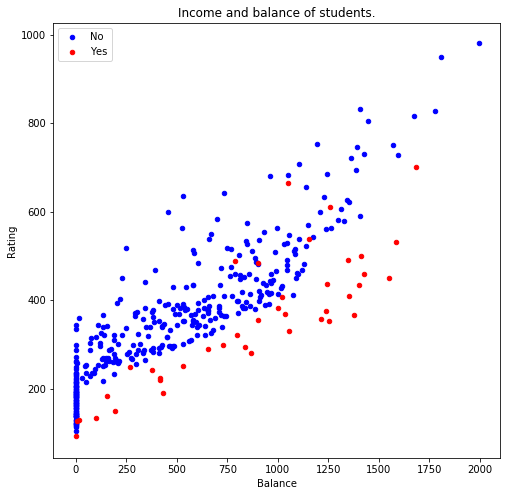

In [0]:
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111)
ax = dataset[dataset.Student == 'No'].plot.scatter('Balance', 'Rating', c='blue', ax=ax)
dataset[dataset.Student == 'Yes'].plot.scatter('Balance', 'Rating', c='red', ax=ax)
ax.legend(['No', 'Yes'])
ax.set_title('Income and balance of students.');

In [0]:
dataset['x0'] = 1

In [0]:
columns_in_order = list(dataset.columns)
columns_in_order.remove('x0')
columns_in_order.insert(0, 'x0')


In [0]:
dataset = dataset[columns_in_order]

In [0]:
random_values = np.random.rand(len(dataset))
train_sample = dataset[random_values < 0.7]
test_sample = dataset[random_values >= 0.7]

In [0]:
def model(row, w):
    return 'No' if row.values[:-1].dot(w) > 0 else 'Yes'

In [0]:
def guess(df, w):
    return df.apply(lambda row: model(row,w), axis = 1)

In [0]:
def find_missclasified(df, guess):
    missclasified = df[df.Student != guess]
    return len(missclasified), None if len(missclasified) == 0 else missclasified.iloc[0] 

In [0]:
find_missclasified(train_sample, guess(train_sample, np.random.rand(3)))

(31, x0           1
 Balance    903
 Rating     483
 Student    Yes
 Name: 1, dtype: object)

In [0]:
def train(df, max_iterations):
    w = np.random.rand(len(df.columns) - 1)
    iterations = 0
    while iterations < max_iterations:
        g = guess(df, w)
        n, miss = find_missclasified(df, g)
        if miss is None:
            break
        update = (1 if miss.Student == 'No' else -1) * \
           miss.values[:-1].astype(float)
        w += update
        iterations += 1
    return w

In [0]:
def pocket(df_train, df_test, max_iterations):
    ein = []
    eout = []
    ws = []
    w = np.random.rand(len(df_train.columns) - 1)
    iterations = 0
    while iterations < max_iterations:
        ws.append(w)
        gin = guess(df_train, w)
        gout = guess(df_test, w)
        n_in, miss_in = find_missclasified(df_train, gin)
        n_out, miss_out = find_missclasified(df_test, gout)
        ein.append(n_in/len(df_train))
        eout.append(n_out/len(df_test))
        if miss_in is None:
            break
        update = (1 if miss_in.Student == 'No' else -1) * \
           miss_in.values[:-1].astype(float)
        w += update
        iterations += 1
    return ws, ein, eout

In [0]:
ws, ein, eout = pocket(train_sample, test_sample, 250)

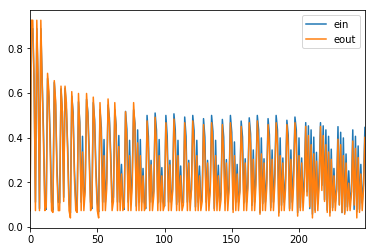

In [0]:
errors = pd.DataFrame({'ws': ws, 'ein': ein, 'eout':eout})
errors[['ein', 'eout']].plot()

In [0]:
w = errors.sort_values(by='ein').iloc[0].ws

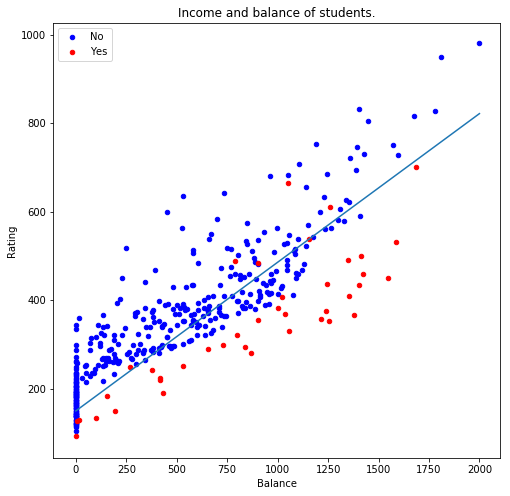

In [0]:
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111)
ax = dataset[dataset.Student == 'No'].plot.scatter('Balance', 'Rating', c='blue', ax=ax)
dataset[dataset.Student == 'Yes'].plot.scatter('Balance', 'Rating', c='red', ax=ax)
ax.legend(['No', 'Yes'])
ax.set_title('Income and balance of students.');

ax.plot([0, 2000], [w[0]/w[2] + w[2]/w[1]*-50, w[0]/w[2] + w[2]/w[1]*-275])

# Non Linear Regression

In [0]:
y = dataset['Student'].apply(lambda x: 1 if x == 'No' else -1)
y.head()

dataset['one'] = 1
X = dataset[['one', 'Balance', 'Rating']]
X.head()

w = np.linalg.pinv(X).dot(y)
w

h = lambda x: np.sign(w.dot(x))
yhat = X.apply(h, axis = 1)
yhat.head()


Pin = (yhat == y).sum()/len(y)
Pin

0.925

In [0]:
dataset2 = dataset.copy()
dataset2['Balance2'] = dataset2['Balance']**2
dataset2['Rating2'] = dataset2['Rating']**2
dataset2['balancerating'] = dataset2['Rating']*dataset2['Balance']

dataset2.head()

X = dataset2[['one', 'Balance', 'Rating', 'Balance2', 'Rating2', 'balancerating']]
X.head()

w = np.linalg.pinv(X).dot(y)
w

h = lambda x: np.sign(w.dot(x))
yhat = X.apply(h, axis = 1)
yhat.head()

Pin2 = (yhat == y).sum()/len(y)
Pin2

0.9425

In [0]:
Balances, Ratings = np.meshgrid(np.array(range(0,20000))/10, np.array(range(0,20000))/10)

boundary = np.zeros(Balances.shape)

for i in range(Balances.shape[0]):
  for j in range(Balances.shape[1]):
    boundary[i,j] = np.abs( w.dot(np.array([1, Balances[i, j], Ratings[i, j], Balances[i,j]**2, Ratings[i,j]**2, Balances[i,j]*Ratings[i,j]])) )< 0.01

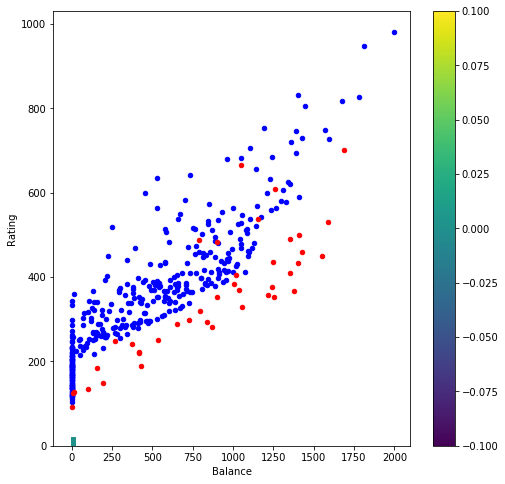

In [0]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111)
im = ax.pcolormesh(Balances, Ratings, boundary)
fig.colorbar(im, ax=ax)

dataset[dataset.Student == 'No'].plot.scatter('Balance', 'Rating', c='blue', ax=ax)
dataset[dataset.Student == 'Yes'].plot.scatter('Balance', 'Rating', c='red', ax=ax)

### Nota: al querer gráficar y ser muchos los datos, no me alcanzó la memoria RAM, por eso no se pudo apreciar la linea curva dentro del plot

# Árboles de Desición

In [0]:
Stock_Market_Challenge = pd.read_csv('https://raw.githubusercontent.com/antoniofromero/Proyecto-Modelos-de-Cr-dito/master/creditrisk.csv').dropna()
hitters = Stock_Market_Challenge
hitters['LogSalary'] = np.log(hitters.Income)
hitters = hitters[['Income', 'Rating', 'LogSalary']]


In [0]:
# Un árbol esta definido por la siguiente estructura
# {'left': None, 'right': None, 'df': df, 'rss': 0}

def _residual_squared_sum(df, y):
    """
    Calculate the residual squared sum in R, using the target y.
    """
    yhat = df[y].mean()
    rss = ((df[y] - yhat)**2).sum()

    return rss, yhat

_residual_squared_sum(hitters, 'LogSalary')

(190.76473019910682, 3.5632399615156256)

In [0]:
def _binary_splitting(df, y, x_j):
    """
    Find the best split using the predictor x_j. 
    """
    
    xj_values = sorted(hitters[x_j].unique())
    min_rss, _ = _residual_squared_sum(hitters, y)
    for i in range(len(xj_values) - 1):
      s = (xj_values[i] + xj_values[i+1]) / 2
      df_left = df[df[x_j] < s]
      df_right = df[df[x_j] >= s]
      rss_left, _ = _residual_squared_sum(df_left, y)
      rss_right, _ = _residual_squared_sum(df_right, y)
      rss_total = rss_left + rss_right

      if rss_total < min_rss:
        min_rss = rss_total
        df_left_min = df_left
        df_right_min = df_right
        min_s = s

    split = {
        'rss': min_rss,
        's': min_s,
        'left': df_left_min,
        'right': df_right_min
    }
    
    return split

_binary_splitting(hitters, 'LogSalary', 'Income')

{'left':      Income  Rating  LogSalary
 0    14.891     283   2.700757
 6    20.996     259   3.044332
 8    15.125     266   2.716349
 11   15.045     138   2.711046
 14   19.144     269   2.951989
 15   20.089     200   3.000172
 17   36.496     339   3.597203
 20   17.700     235   2.873565
 21   37.348     458   3.620279
 22   20.103     213   3.000869
 24   10.742     156   2.374161
 25   14.090     326   2.645465
 27   32.793     333   3.490215
 29   26.813     411   3.288887
 30   34.142     413   3.530528
 31   28.941     210   3.365259
 33   31.367     162   3.445756
 34   20.150     199   3.003204
 35   23.350     220   3.150597
 37   30.007     462   3.401431
 38   11.795     300   2.467676
 39   13.647     264   2.613520
 40   34.950     253   3.553918
 43   36.929     445   3.608997
 44   31.861     469   3.461383
 46   19.531     376   2.972003
 50   36.362     376   3.593524
 53   16.304     413   2.791410
 54   15.333     138   2.730007
 55   32.916     154   3.493959


In [0]:
def _recursive_binary_splitting(df, y, predictors):
    """
    Select the best variable to reduce the
    residual square sum from predictors.
    """
    best_split = _binary_splitting(df, y, predictors[0])
    best_split['x_j'] = predictors[0]
    min_rss = best_split['rss']
    for x_j in predictors[1:]:
      split = _binary_splitting(df, y, x_j)
      if split['rss'] < min_rss:
        min_rss = split['rss']
        best_split = split
        best_split['x_j'] = x_j
      
    return best_split

_recursive_binary_splitting(hitters, 'LogSalary', ['Income', 'Rating']).keys()

dict_keys(['rss', 's', 'left', 'right', 'x_j'])

In [0]:
def _make_tree(df, y):
    rss, yhat = _residual_squared_sum(df, y)
    return {'left': None, 'right':None, 
            'rss': rss,
            'yhat': yhat,
            'df': df,
            'y': y}

def _grow_tree(tree, predictors, min_points_per_leaf=5):
    """
    Recursively divide tree using the split that
    minimize rss. It stops when the region have
    less than 5 elements.
    """
    df = tree['df']
    if len(df) <= min_points_per_leaf:
      return
    else:
      split = _recursive_binary_splitting(df, tree['y'], predictors)
      tree['x_j'] = split['x_j']
      tree['s'] = split['s']
      tree_left = _make_tree(split['left'], tree['y'])
      tree_right = _make_tree(split['right'], tree['y'])
      _grow_tree(tree_left, predictors)
      _grow_tree(tree_right, predictors)
      tree['left'] = tree_left
      tree['right'] = tree_right

hitters_tree = _make_tree(hitters, 'LogSalary')
_grow_tree(hitters_tree, ['Income', 'Rating'], min_points_per_leaf=100)

In [0]:
def _is_leaf(tree):
  return tree['left'] is None and tree['right'] is None

def _evaluate(tree, event):
  if _is_leaf(tree):
    return tree['df']
    #return tree['df'][tree['y']].mean()
  else:
    if event[tree['x_j']] < tree['s']:
      return _evaluate(tree['left'], event)
    else:
      return _evaluate(tree['right'], event)

_evaluate(hitters_tree, hitters[['Income', 'Rating']].iloc[128])

,Income,Rating,LogSalary
128,123.299,610,4.814612
174,121.834,750,4.802659
191,124.290,701,4.822618
224,121.709,584,4.801633
326,125.480,721,4.832146


In [0]:
def _is_leaf(tree):
  return tree['left'] is None and tree['right'] is None


def _tree_rss(tree):
    """
    Calculate the total rss of a tree: the sum of the rss of
    all leaves.
    """
    rss = 0
    
    if _is_leaf(tree):
      return tree['rss']
    else:
      if tree['left']:
        rss += _tree_rss(tree['left'])
      if tree['right']:
        rss += _tree_rss(tree['right'])
        
    return rss
_tree_rss(hitters_tree)

0.015608010172732414

In [0]:
def _count_leafs(tree):
    """
    Return the number of leaves in the tree.
    """
    num_leafs = 0
    if _is_leaf(tree):
      return 1
    else:
      if tree['left']:
        num_leafs += _count_leafs(tree['left'])
      if tree['right']:
        num_leafs += _count_leafs(tree['right'])
    
    return num_leafs

_count_leafs(hitters_tree)

116

In [0]:
def _cost_complexity(tree, alpha = 1):
  return _tree_rss(tree) + alpha*_count_leafs(tree)

_cost_complexity(hitters_tree)

116.01560801017273

In [0]:
def _is_last_branch(tree):
    """
    Return if a given tree is the last branch, i.e. both 
    subtrees are leaves.
    """
    return _is_leaf(tree['left']) and _is_leaf(tree['right'])

def _find_min_deltarss(tree):
    """
    Find the tree that reduces for which the split reduces
    the least the rss.
    """    
    if _is_last_branch(tree):
      deltarss = tree['rss'] - tree['left']['rss'] - tree['right']['rss']
      return deltarss, tree
    else:
      if _is_leaf(tree['left']):
        return _find_min_deltarss(tree['right'])
      elif _is_leaf(tree['right']):
        return _find_min_deltarss(tree['left'])
      else:
        min_deltarss_left, min_tree_left = _find_min_deltarss(tree['left'])
        min_deltarss_right, min_tree_right = _find_min_deltarss(tree['right'])
        if min_deltarss_left < min_deltarss_right:
          return min_deltarss_left, min_tree_left
        else:
          return min_deltarss_right, min_tree_right

_find_min_deltarss(hitters_tree)

(1.8331264599192347e-05, {'df':      Income  Rating  LogSalary
  6    20.996     259   3.044332
  77   20.936     253   3.041470
  202  21.038     145   3.046330
  242  20.918     128   3.040610
  333  21.011     261   3.045046
  375  20.974     413   3.043284, 'left': {'df':      Income  Rating  LogSalary
   77   20.936     253    3.04147
   242  20.918     128    3.04061,
   'left': None,
   'right': None,
   'rss': 3.699142991911473e-07,
   'y': 'LogSalary',
   'yhat': 3.041040098779961}, 'right': {'df':      Income  Rating  LogSalary
   6    20.996     259   3.044332
   202  21.038     145   3.046330
   333  21.011     261   3.045046
   375  20.974     413   3.043284,
   'left': None,
   'right': None,
   'rss': 4.910268685068679e-06,
   'y': 'LogSalary',
   'yhat': 3.044747988806565}, 'rss': 2.3611447583452175e-05, 's': 20.955, 'x_j': 'Income', 'y': 'LogSalary', 'yhat': 3.043512025464364})

In [0]:
from copy import deepcopy

def _prune_tree(tree, alpha):
    working_tree = deepcopy(tree)
    rss = _tree_rss(working_tree)
    num_leafs = _count_leafs(working_tree)
    min_cc = rss + alpha*num_leafs
    min_cc_tree = deepcopy(tree)
    while not _is_leaf(working_tree):
      deltarss, tree_to_remove = _find_min_deltarss(working_tree)
      tree_to_remove['left'] = None
      tree_to_remove['right'] = None
      rss = rss + deltarss
      num_leafs -= 1
      cost_complexity = rss + alpha*num_leafs
      if cost_complexity < min_cc:
        min_cc = cost_complexity
        min_cc_tree = deepcopy(working_tree)
      print(rss, cost_complexity)
    
    return min_cc_tree

pruned_tree = _prune_tree(hitters_tree, 1)

0.015626341437331607 115.01562634143733
0.015647284120503976 114.0156472841205
0.015680947841059303 113.01568094784106
0.015731235141892067 112.01573123514189
0.015800537637456213 111.01580053763746
0.01589356843550291 110.0158935684355
0.015995473980238716 109.01599547398024
0.016109334879355477 108.01610933487936
0.016224908029745508 107.01622490802974
0.01636628908071444 106.01636628908071
0.01651435927971669 105.01651435927971
0.01667441693647847 104.01667441693648
0.016855785437551497 103.01685578543756
0.017038420726081582 102.01703842072608
0.01722563640618462 101.01722563640618
0.017433489518901397 100.01743348951891
0.017651485756426027 99.01765148575643
0.017871797108608867 98.01787179710861
0.018112802858771742 97.01811280285877
0.018361867049819756 96.01836186704982
0.018619187957669675 95.01861918795767
0.018914081998310867 94.0189140819983
0.01923862308685087 93.01923862308685
0.019641737336496094 92.0196417373365
0.02005822336970918 91.02005822336972
0.020486964249498234

In [0]:
import graphviz
from IPython import display

def make_node(g, name, tree):
    attributes = {'label': 'rss: {:0.2f}'.format(tree['rss']),
                  'shape': 'square'}
    if tree.get('y_hat'):
        attributes['label'] += '\n y_hat: {:0.2f}'.format(tree['y_hat'])
    g.node(name, **attributes)
    
def make_edge(g, parent, child, tree, direction):
    attributes = {}
    if direction == 'l':
        attributes['label'] = '{} < {}'.format(tree['x_j'], tree['s'])
    if direction == 'r':
        attributes['label'] = '{} >= {}'.format(tree['x_j'], tree['s'])
    g.edge(parent, child, **attributes)
    

def construct_tree(g, dna, tree):
    if not tree['left'] and not tree['right']:
        make_node(g, dna, tree)
    else:
        make_node(g, dna + 'l', tree['left'])
        make_edge(g, dna, dna + 'l', tree, 'l')
        construct_tree(g, dna + 'l', tree['left'])

        make_node(g, dna + 'r', tree['right'])
        make_edge(g, dna, dna + 'r', tree, 'r')
        construct_tree(g, dna + 'r', tree['right'])
        
def visualize_tree(tree):
    g = graphviz.Graph('tree', 'tree.dot', engine='dot')
    make_node(g, 'r', tree)
    construct_tree(g, 'r', tree)
    display.display(g)

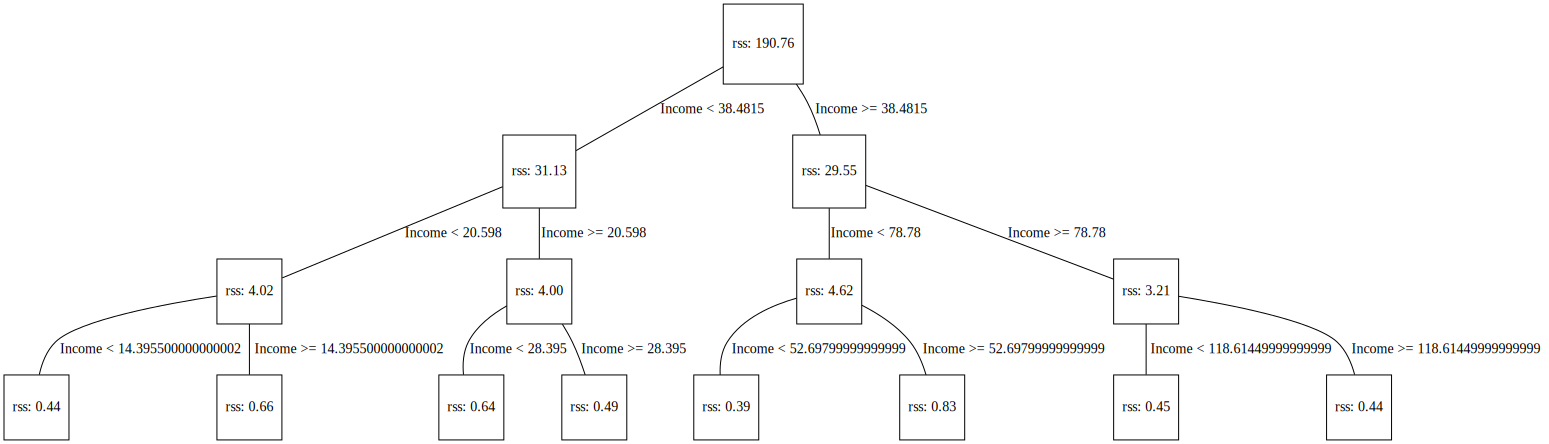

In [0]:
visualize_tree(pruned_tree)